In [1]:
#!pip install tensorflow
#!pip install keras --upgrade

In [2]:
#!pip install keras

In [3]:
#!pip install keras --upgrade

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
image_size = 256
batch_size = 32
channels = 3
epochs = 40

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("C:\\Users\\Acer\\Downloads\\jaimin-app-master\\jaimin-app-master\\dataset\\WormData",
                    shuffle = True,
                    image_size = (image_size, image_size),
)

Found 240 files belonging to 2 classes.


In [7]:
class_name = dataset.class_names
class_name

['corn_earworm', 'fall_armyworm']

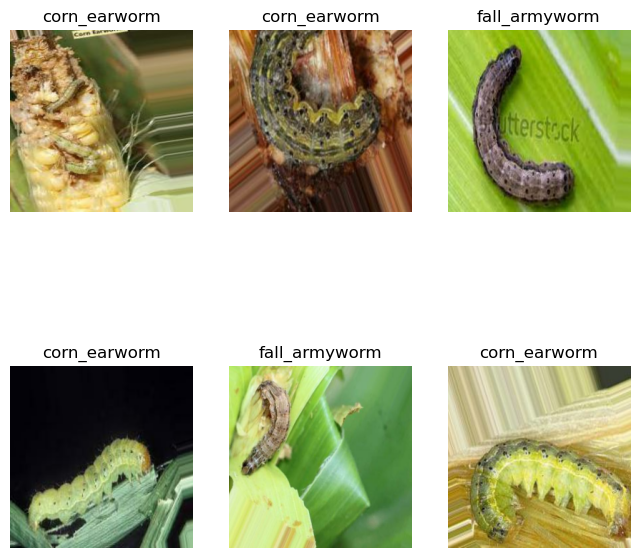

In [8]:
plt.figure(figsize = (8,8))
for image_batch, label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [9]:
print(len(dataset))

8


In [10]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# Spli dataset into train, test and validation
def get_dataset_partitions_tf(ds, train_split = 0.7, test_split = 0.3, shuffle = True, shuffle_size = 10 ):
    ds_size = len(ds) #8
    train_size = int(train_split* ds_size)
    train_ds = ds.take(train_size)
    
    test_size = int(test_split * ds_size)
    test_ds = ds.skip(train_size).take(test_size)
    return train_ds, test_ds

In [12]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(test_ds))

5
2


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
#Data scaling, resizing
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size, image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [15]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
    
])

model.build(input_shape = input_shape)

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# from keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint("model/model.keras", monitor = "val_accuracy", save_best_only = True)

In [18]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [19]:
history = model.fit(train_ds,
                   epochs = epochs,#40
                   batch_size = batch_size,#8
                   verbose = 1,
                   validation_data = test_ds)#verbose is for the level of detail provided to output or log of model or algorithm

Epoch 1/40


5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4688 - loss: 0.7037 - val_accuracy: 0.5938 - val_loss: 0.6730
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5312 - loss: 0.6837 - val_accuracy: 0.5938 - val_loss: 0.6654
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5632 - loss: 0.6647 - val_accuracy: 0.6250 - val_loss: 0.6203
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6606 - loss: 0.6111 - val_accuracy: 0.7344 - val_loss: 0.5609
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6950 - loss: 0.5965 - val_accuracy: 0.5625 - val_loss: 0.6148
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6392 - loss: 0.6034 - val_accuracy: 0.7500 - val_loss: 0.5923
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6752 - loss: 0.6063 - val_accuracy: 0.6250 - val_loss: 0.6218
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.7860 - loss: 0.5722 - val_accuracy: 0.7656 - val_loss: 0.5011
Epoch 9/40
5/5 ━━━━━━

In [20]:
# model evaluation on test datset
score = model.evaluate(test_ds) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.9479 - loss: 0.3516


In [21]:
from keras.models import save_model

In [22]:
save_model(model, "model/model.keras")

In [23]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

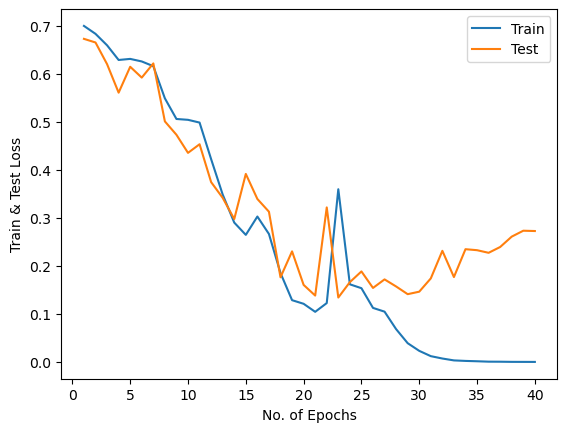

In [24]:
# list of epoch number 
x = list(range(1,epochs+1)) 
plt.xlabel("No. of Epochs")
plt.ylabel("Train & Test Loss")
plt.plot(x, loss)
plt.plot(x, val_loss)
plt.legend(["Train","Test"])
plt.show()

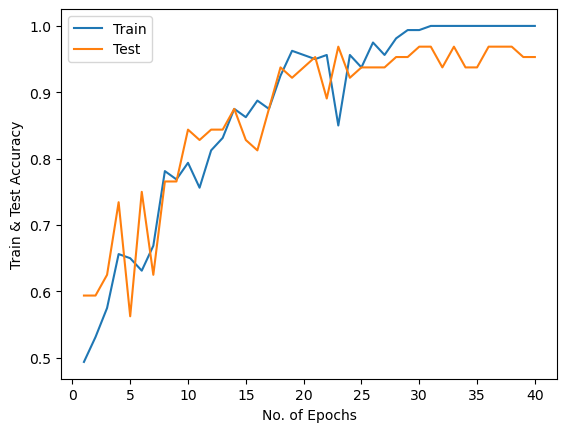

In [25]:
# list of epoch number 
x = list(range(1,epochs+1)) 
plt.xlabel("No. of Epochs")
plt.ylabel("Train & Test Accuracy")
plt.plot(x, acc)
plt.plot(x, val_acc)
plt.legend(["Train","Test"])
plt.show()

First image to predict
Actual label:  corn_earworm
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
Predicted Lablel corn_earworm with accuracy of:  100.0 %


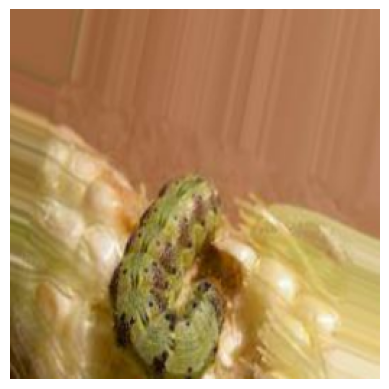

In [26]:
for image_batch, label_batch in test_ds.take(1):
    first_img = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_img)
    print("Actual label: ",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Lablel", class_name[np.argmax(batch_prediction[0])],"with accuracy of: ",acc[-1]*100,"%")
    plt.axis("off")

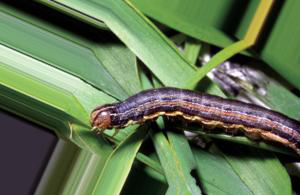

In [27]:
from PIL import Image
image_path=("C:\\Users\\Acer\\Downloads\\jaimin-app-master\\jaimin-app-master\\dataset\\WormData\\fall_armyworm\\armyworm_0_1027.jpeg")
image=Image.open(image_path)
image

In [28]:
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array,0) # create a batch
    
predictions = model.predict(img_array)
print(predictions)
predicted_class = class_name[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])),2)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
[[3.5805614e-09 1.0000000e+00]]


In [29]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array,0) # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

In [30]:
print(predict(model,image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
('fall_armyworm', 100.0)


In [31]:
# tf.keras.models.save_model(model,'my_model2.hdf5')

In [32]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("C:\\Users\\Acer\\Downloads\\jaimin-app-master\\jaimin-app-master\\model\\model.keras")

# Preprocess the input image
def preprocess_image(image):
    img = image.resize((224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Make predictions on the input image
def predict(image):
    processed_image = preprocess_image(image)
    predictions = model.predict(processed_image)
    class_index = np.argmax(predictions)
    class_label = ['corn_earworm', 'fall_armyworm'][class_index]
    confidence = predictions[0][class_index] * 100
    return class_label, confidence
